ROI_3.png
[[[ 71 122 100]
  [ 60 108  86]
  [ 48  93  73]
  ...
  [ 64  36  32]
  [ 62  35  30]
  [ 59  32  29]]

 [[ 53 101  80]
  [ 38  82  62]
  [ 25  65  48]
  ...
  [ 64  36  32]
  [ 62  36  31]
  [ 61  34  30]]

 [[ 55 101  81]
  [ 36  78  61]
  [ 22  61  44]
  ...
  [ 65  37  33]
  [ 64  36  32]
  [ 62  35  31]]

 ...

 [[128 169 159]
  [128 169 159]
  [130 169 160]
  ...
  [145 171 164]
  [148 175 166]
  [144 172 164]]

 [[109 146 138]
  [109 146 137]
  [110 146 138]
  ...
  [134 156 150]
  [135 158 151]
  [133 155 149]]

 [[ 91 124 117]
  [ 91 123 117]
  [ 92 123 117]
  ...
  [116 134 129]
  [115 133 128]
  [113 133 127]]]
100% Color [132.08658009 143.24265615 110.1418522 ]
Color [132, 143, 110]
Percentage 100%
ROI_2.png
[[[162 205 183]
  [162 205 183]
  [162 205 183]
  ...
  [145 197 169]
  [141 198 169]
  [140 199 169]]

 [[146 198 173]
  [147 199 174]
  [147 199 174]
  ...
  [146 197 169]
  [143 198 170]
  [142 200 171]]

 [[137 196 169]
  [138 197 170]
  [139 197 170]
  ..

TypeError: Image data of dtype object cannot be converted to float

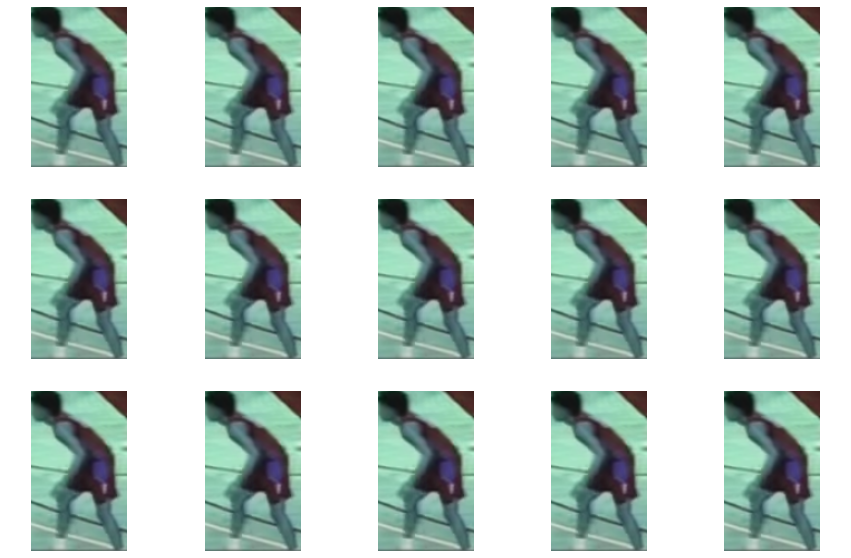

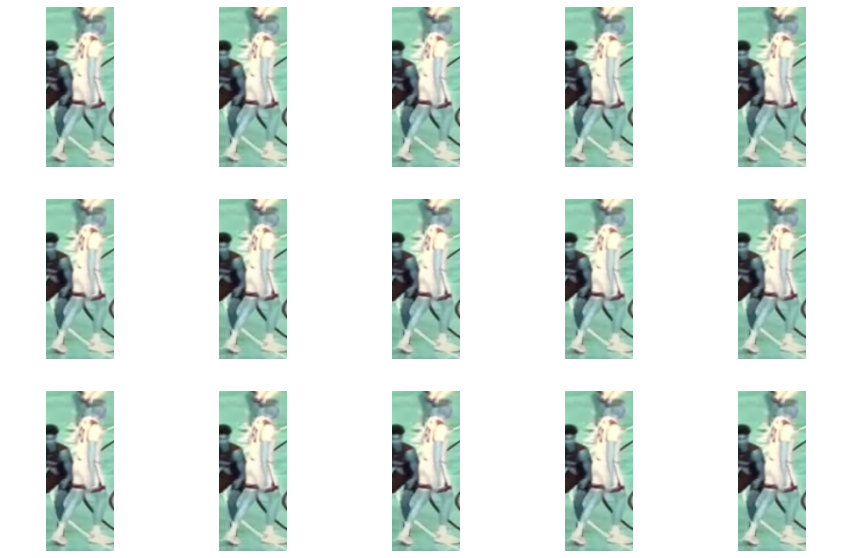

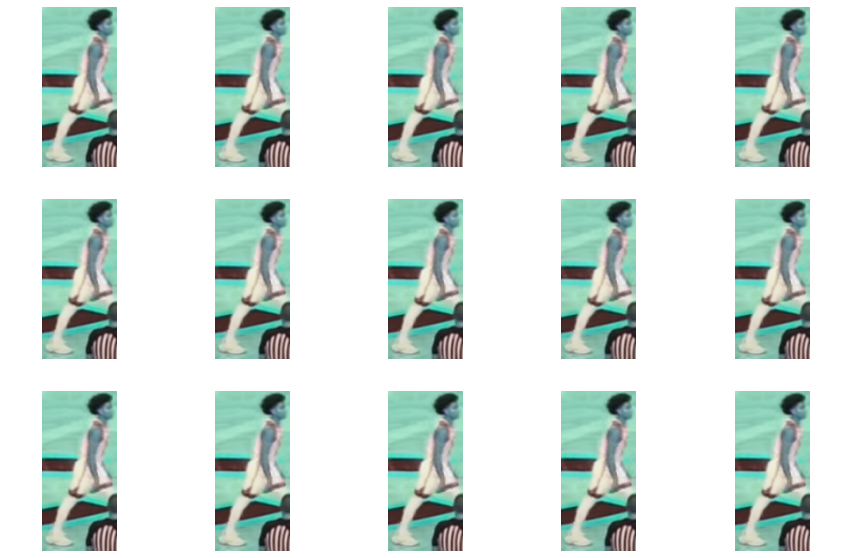

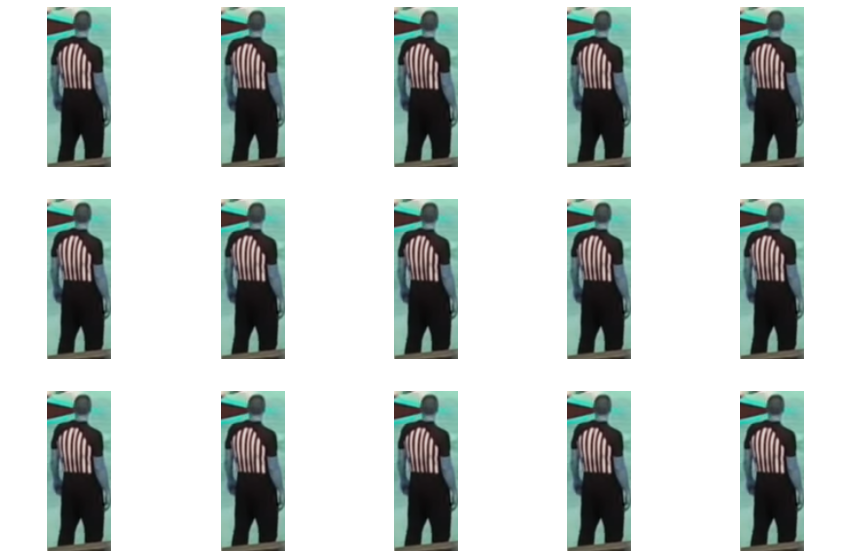

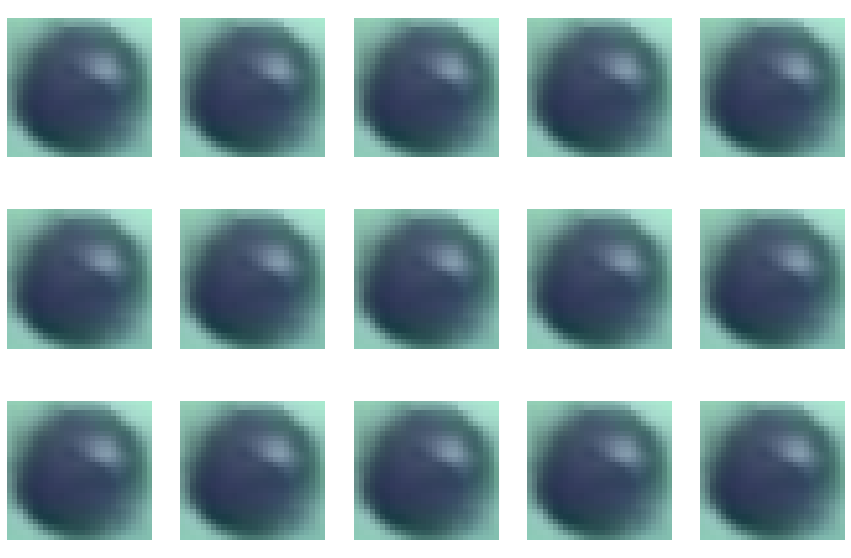

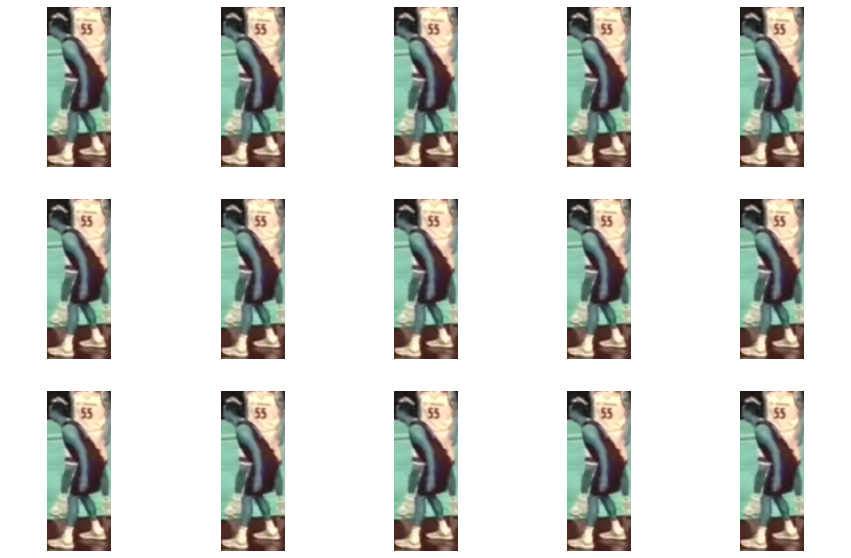

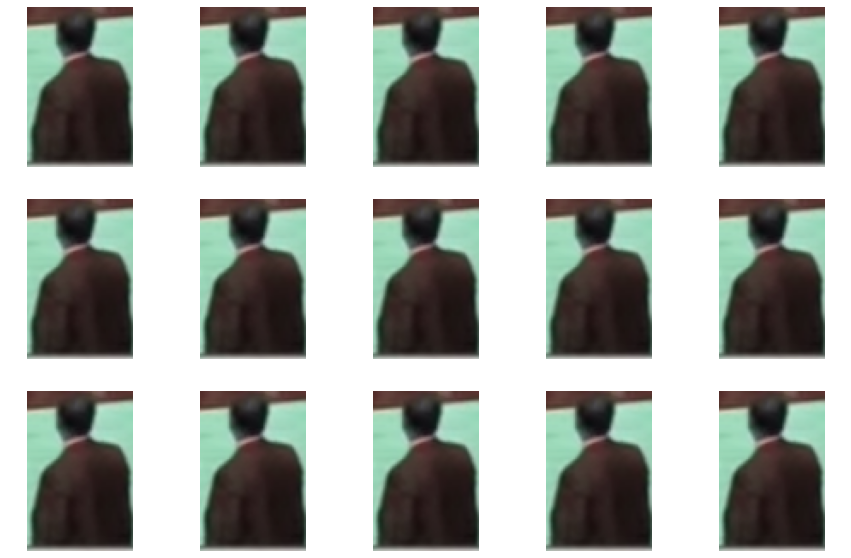

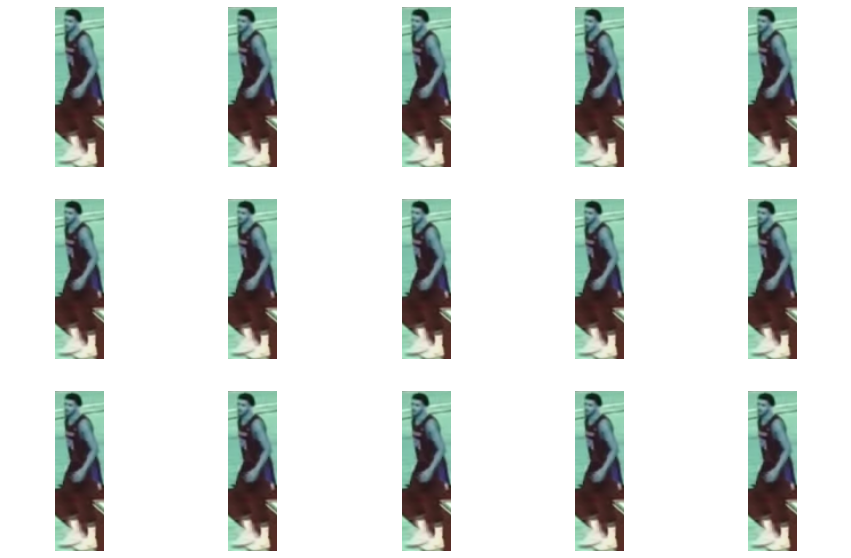

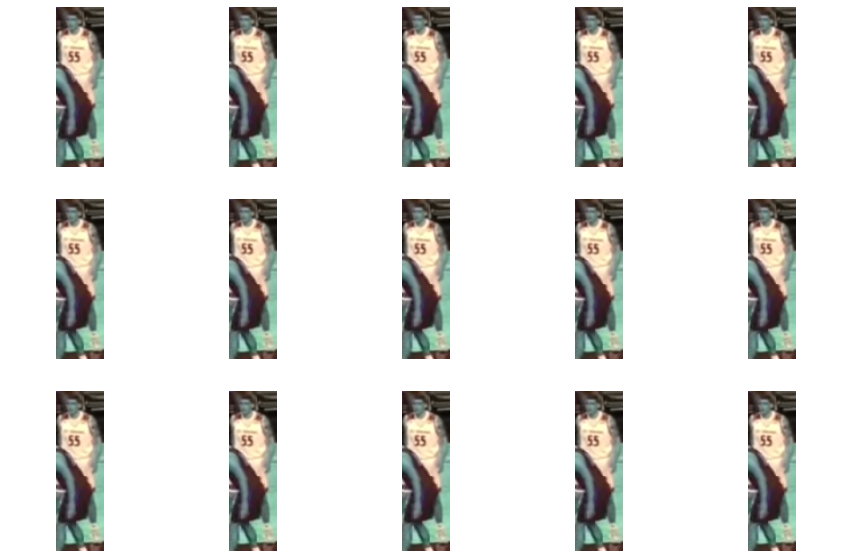

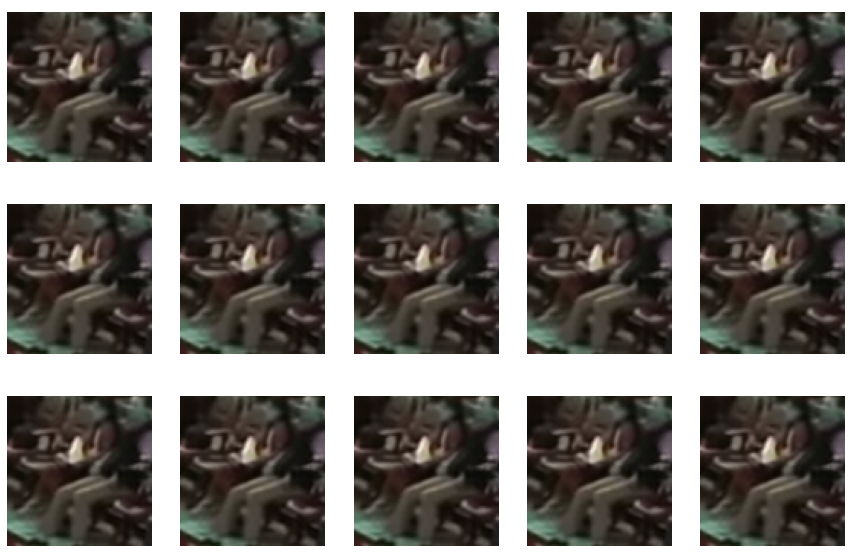

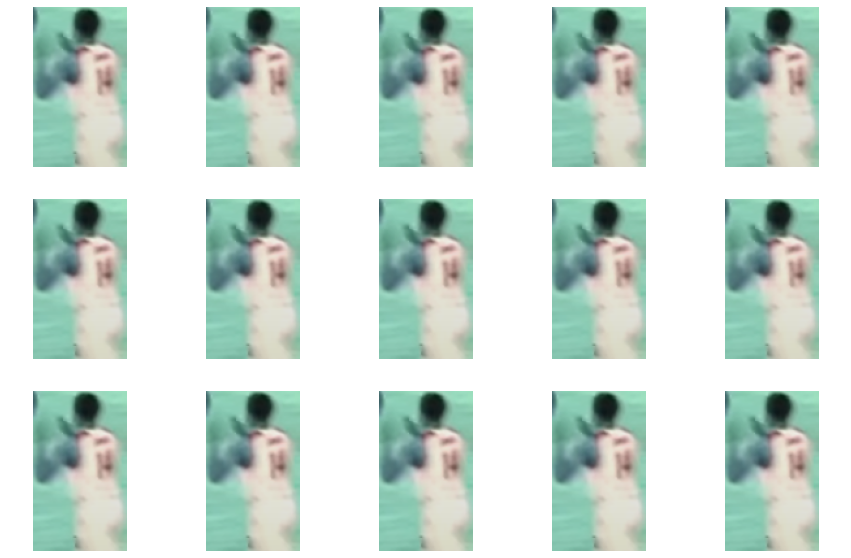

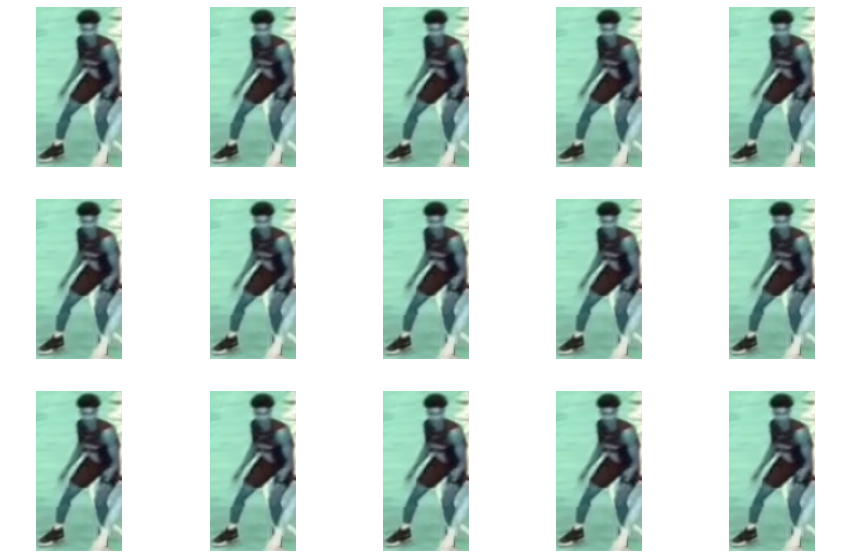

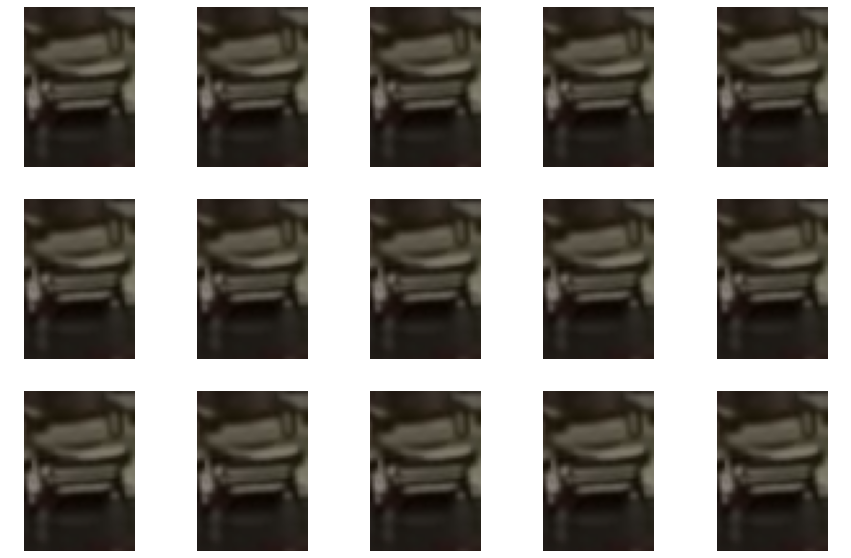

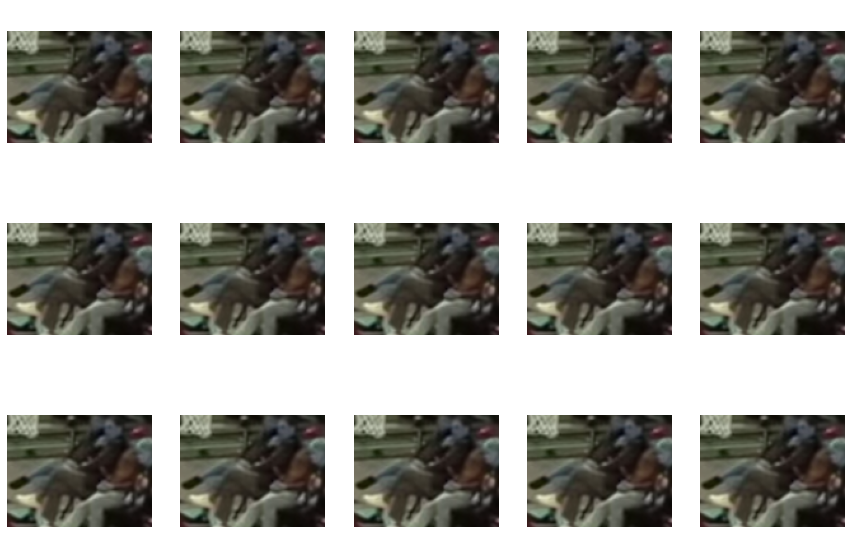

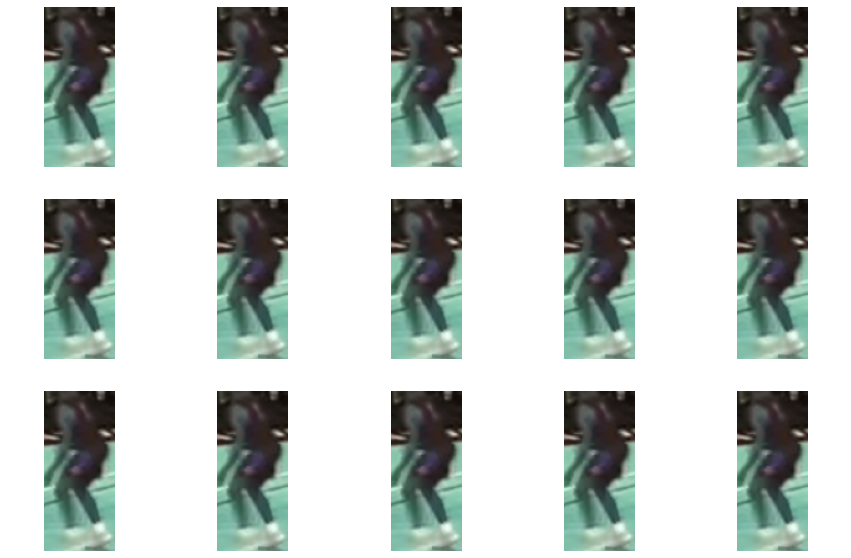

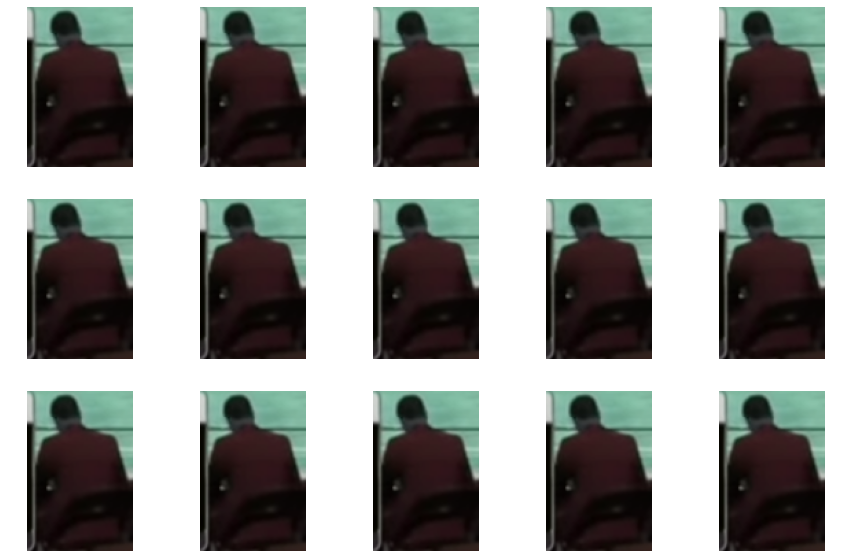

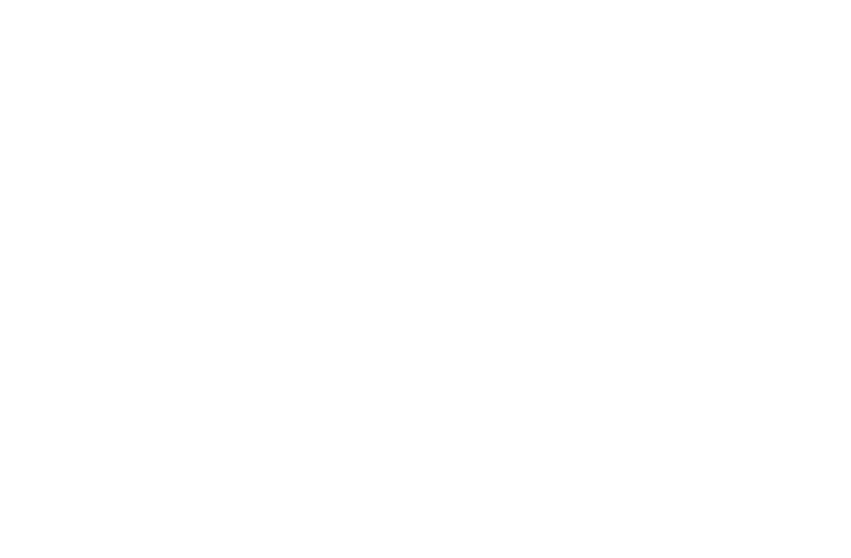

In [1]:
import cv2
import numpy as np
import argparse
import ntpath
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import csv


def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

def plot_colors(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        print("Color %s" %color.astype("uint8").tolist())
        print("Percentage %d%%" %int(percent*100))
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

def print_colors(hist, centroids):
    for (percent, color) in zip(hist, centroids):
        p = int(percent*100)    
        print("%d%% Color %s" %(p, color))    

def save_color_bar(bar, filename):
    head, tail = ntpath.split(filename)
    parts = tail.split(".")
    output = "{}/{}-colorbar.jpg".format(head, parts[0])
    print("Color bar stored in %s" %output)
    cv2.imwrite(output, bar)


# construct the argument parse and parse the arguments
path = "/Users/gauravmohan/Documents/PycharmProjects/basketball/basketballVideoAnalysis-master/mini-map-tutorial/images"
with open('team_color.csv', mode='w') as team_color_file:
    team_color_writer = csv.writer(team_color_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    team_color_writer.writerow(['team', 'red', 'green', 'blue', 'percentage'])

    f = []
    for filename in os.listdir(path):
        image_file = filename
        print((image_file))
        img = cv2.imread(path+'/'+str(image_file))
        
        fig = plt.figure(figsize=(15, 10))
        plt.axis('off')
        for i in range(3):
            for j in range(5):
                k = i*5 + j + 1
                fig.add_subplot(3, 5, k)
                plt.axis('off')
                plt.imshow(img)
        print(img)
        try:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        except:
            break

        img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
        clt = KMeans(n_clusters=1) #cluster number
        clt.fit(img)

        hist = find_histogram(clt)
        print_colors(hist, clt.cluster_centers_)

        bar = plot_colors(hist, clt.cluster_centers_)        

        for (percent, color) in zip(hist, clt.cluster_centers_):
            colorList = color.astype("uint8").tolist()
            # hexColor = '#%02x%02x%02x' %(colorList[0], colorList[1], colorList[2])
            #hexa = '%02x%02x%02x' % tuple((colorList[0], colorList[1], colorList[2]))
            team_color_writer.writerow([filename, colorList[0], colorList[1], colorList[2]])
            
        # save_color_bar(bar, image_file)


# plt.axis("off")
# plt.imshow(bar)
# plt.show()


In [19]:
import webcolors

def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.css21_hex_to_names.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    return actual_name, closest_name

csvfile = "team_color.csv"
data = pd.read_csv(csvfile)
RowCnt = len(data.index)

for i in range(0,RowCnt):
    l = [data.iat[i,1],data.iat[i,2],data.iat[i,3]]
    actual_name, closest_name = get_colour_name(l)
    print("Actual colour name:", actual_name, ", closest colour name:", closest_name)


Actual colour name: None , closest colour name: grey
Actual colour name: None , closest colour name: silver
Actual colour name: None , closest colour name: grey
Actual colour name: None , closest colour name: grey
Actual colour name: None , closest colour name: grey
Actual colour name: None , closest colour name: grey
Actual colour name: None , closest colour name: grey
Actual colour name: None , closest colour name: grey
Actual colour name: None , closest colour name: grey
Actual colour name: None , closest colour name: black
Actual colour name: None , closest colour name: silver
Actual colour name: None , closest colour name: grey
Actual colour name: None , closest colour name: black
Actual colour name: None , closest colour name: teal
Actual colour name: None , closest colour name: grey
Actual colour name: None , closest colour name: black
